In [1]:
from rolling.embedding import get_embedding

In [5]:
# embedding test
from scipy.spatial.distance import cosine
def get_similarity(embedding1, embedding2):
    return 1 - cosine(embedding1, embedding2)

results = [
    get_embedding("machine learning"),
    get_embedding("deep learning")
]

similarity = get_similarity(results[0], results[1])
print(similarity)

results = [
    get_embedding("machine learning"),
    get_embedding("cow")
]

similarity = get_similarity(results[0], results[1])
print(similarity)

0.7913183346420749
0.4277914631190046


In [7]:
# load text
# files = ["text1_atari200.txt", "text2_shakespear", "text3_wikipedia.txt"]
files = ["text1_atari200.txt"]
text = ""
for file in files:
    with open(f'texts/{file}', "r", encoding='UTF-8') as f:
        text += f.read()
text = text.replace("\n", " ")
len(text), text[:100]

(28052,
 'Human-level Atari 200x faster Steven Kapturowski1 , Víctor Campos*1, Ray Jiang*1, Nemanja Rakićević1')

In [8]:
def split_text(text, n=512):
    return [text[i:i+n] for i in range(0, len(text), n)]

In [9]:
# generate embedding for all sentences
import numpy as np
from tqdm import tqdm
from dataclasses import dataclass

@dataclass
class Sentence:
    text: str
    embedding: np.ndarray

results = []
parts = split_text(text, 512)
for sentence in tqdm(parts):
    embedding = get_embedding(sentence)
    results.append(Sentence(sentence, embedding))

results[0].text, results[0].embedding.shape, results[0].embedding

100%|██████████| 55/55 [00:01<00:00, 53.24it/s]


('Human-level Atari 200x faster Steven Kapturowski1 , Víctor Campos*1, Ray Jiang*1, Nemanja Rakićević1 , Hado van Hasselt1 , Charles Blundell1 and Adrià Puigdomènech Badia1 1DeepMind, *Equal contribution The task of building general agents that perform well over a wide range of tasks has been an impor\x02tant goal in reinforcement learning since its inception. The problem has been subject of research of a large body of work, with performance frequently measured by observing scores over the wide range of environm',
 (1024,),
 array([ 0.66485149,  0.82783431, -0.14713053, ...,  0.3535212 ,
        -0.21945897, -0.31591722], shape=(1024,)))

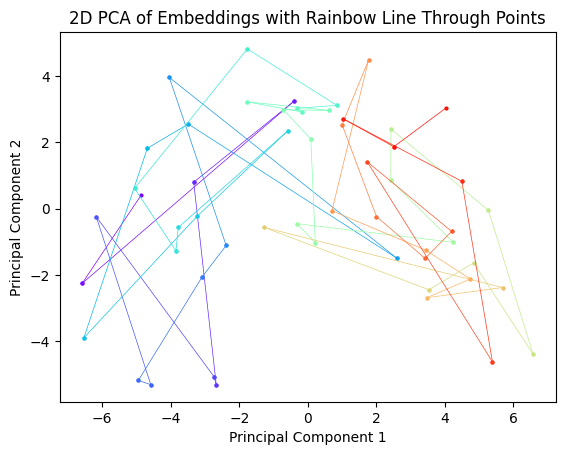

In [11]:
# Visualize
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming embeddings are extracted as shown
embeddings = np.array([sentence.embedding for sentence in results])

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Generate colors
num_points = reduced_embeddings.shape[0]
colors = cm.rainbow(np.linspace(0, 1, num_points))

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the points and the line through them in rainbow colors
for i in range(num_points - 1):
    ax.plot(reduced_embeddings[i:i+2, 0], reduced_embeddings[i:i+2, 1], color=colors[i], marker='o', markersize=2,linewidth=0.5)

plt.title('2D PCA of Embeddings with Rainbow Line Through Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
